In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import matplotlib.lines as mlines
from scipy import interpolate

In [3]:
π = np.pi
hbar = 6.58211899e-16           #h/2π in [eV*s]
m0 = 9.10938215e-31             #electron mass in [kg]
e0 = 1.602176487e-19            #electron charge in [C]
ηm = (hbar**2*e0*10**20)/m0     #hbar^2/mo in [eV A^2]
μB = 5.7883818066e-2            #in [meV/T]
meVpK = 8.6173325e-2            #Kelvin into [meV]

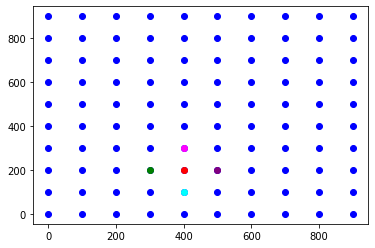

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


TypeError: 'bool' object is not iterable

In [18]:
ax = 100.0  #unit cell size along x-direction in [A]
ay = 100.0
Ny = 10     #number of lattice sites in y direction
Nx = 10     #number of lattice sites in x direction
N = Ny*Nx

#lattice array is Nx2, first column is array of x values in units of [A], second column is y values in units of [A]
#NN_arr is Nx4, the columns store the index of the nearest neighbors. 
#Left: NN[n,0] = (n-Nx), Above: NN[n,1] = n+1, Right: NN[n, 2] = n+1, Down NN[n, 3] = n+Nx
#if there is no lattice site in nearest neighbor spot, value is -1

lattice = np.zeros((Nx, Ny))
coor = np.zeros((N,2))
NN_arr = np.zeros((N,4))

#defining lattice
for i in range(Ny):
    for j in range(Nx):
        lattice[i, j] = j + i*Ny
        
#defining coordinate array        
for i in range(Nx):
    for j in range(Ny):
        n = i + Nx * j
        x = (i) * ax
        y = (j) * ay
        coor[n,0] = x
        coor[n,1] = y
        
#defining nearest neighbor array        
def NN_Arr(c_arr, ax, ay):
    N = c_arr.shape[0]
    tol = 1e-8
    NN = -1*np.ones((N,4), dtype = 'int')
    for n in range(N):
        for m in range(N):
            xn = c_arr[n, 0]
            xm = c_arr[m, 0]
            yn = c_arr[n,1]
            ym = c_arr[m,1]
            
            if abs((xn - xm) - ax)< tol and abs(yn - ym) < tol:
                NN[n, 0] = m
            if abs((xn - xm) + ax) < tol and abs(yn - ym) < tol:
                NN[n, 2] = m
            if abs((yn - ym) + ay) < tol and abs(xn - xm) < tol:
                NN[n, 1] = m 
            if abs((yn - ym) - ay) < tol and abs(xn - xm) < tol:
                NN[n, 3]= m
    return NN

#alternative algorithm to get NN array. Uses defined lattice sites for conditional statements, may be useful when changing
# .. geometry

count = 0
NN2 = np.zeros((N,4))
for i in range(len(lattice[0])):
    for j in range(len(lattice[1])):
        if j == 0:
            NN[count, 0] = -1
        else:
            NN[count, 0] = lattice[i,j] - 1
        if i == 0:
            NN[count, 1] = -1
        else:
            NN[count, 1] = lattice[i,j] - Nx
        if j == Nx-1:
            NN[count, 2] = -1
        else:
            NN[count, 2] = lattice[i,j] + 1
        if i == Nx-1:
            NN[count, 3] = -1
        else:
            NN[count, 3] = lattice[i,j] + Nx
        count += 1

NN =   NN_Arr(coor, ax, ay) 

idx = 24
plt.scatter(coor[:,0],coor[:,1],c = 'b')
plt.scatter(coor[idx,0],coor[idx,1],c = 'r')
plt.scatter(coor[NN[idx,0],0],coor[NN[idx,0],1],c = 'g')  
plt.scatter(coor[NN[idx,1],0],coor[NN[idx,1],1],c = 'magenta')
plt.scatter(coor[NN[idx,2],0],coor[NN[idx,2],1],c = 'purple') 
plt.scatter(coor[NN[idx,3],0],coor[NN[idx,3],1],c = 'cyan') 
plt.show()        
    
#for i in (NN == np.transpose(NN2)):
#    if (i.any())!= True:
#        print('Not equal')
        
#print(lattice)
#print(NN[:,3])

# Descritizing $k_x$ and $k_y$